In [1]:
import json
import requests
import pandas as pd
from config import api_key
from pathlib import Path
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Zillow Data URL
URL_Data_Csv = (f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA.json?qopts.export=true&api_key={api_key}")

# API Call
data_csv = requests.get(URL_Data_Csv).json()

In [4]:
# Retrieve csv download link
data_link = data_csv['datatable_bulk_download']['file']['link']
data_link

'https://quandl-production-datahub.s3.amazonaws.com/export/ZILLOW/DATA/ZILLOW_DATA_962c837a6ccefddddf190101e0bafdaf.zip?X-Amz-Expires=1800&X-Amz-Date=20231009T035200Z&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEKv//////////wEaCXVzLWVhc3QtMSJHMEUCIDG%2BX2CZqiYxMtZqPSL%2Bux2y7hdEsJg5jdd%2BUFZAwUaCAiEAyT2etKWvye2%2BwO3iflbDSlGPoRqSW9R6JBWsVDsDL7kqvAUItP//////////ARACGgwzMDYzMjA1MDAyMDQiDKSHLdv1FL9EC/W8KiqQBdyeex/rTo0q534J3yag3WQxpBcq8K68SwvAiEQq628pweheZzn3rsXU/uvGLiulMlzVF8tBlylCi1BXsFX3ZgnxvygDJvb3ZqAj7C7GX42nxIME/kJHUXrw2F3ybfJsjpedZkKFxxWy0RS7bZinrf4s1TFzjZusTSm8/iw3TJST2KWq8zTpKVRHzrKiKD/VwjtxIrZgbQ3qN%2Bd%2BKytCJSMzajQVNRchptkr8zZsgQX1LY3Cg4g8jaOPrXSfhfjzEuJQlpCqIFxpmmedEmFnG4qPQVA8MeH5DZqbrz8RGo2RVb9IlnRDqxzfplL23qx%2BoUiu8TE/scGU31u5zQTtZFxHQ%2BY%2BKR9QJg3ANUKicB8Wj3p2R9k5%2B7Awlc7G5QRNxzMdVxgWrdIKAydB45BjdGN2R80CIMmeGydfvjyNtx5n8VWux05Yt7yNZPz2P9GufMo%2Bj9ddi21Evex/ycVORhokLfjkhBGM%2Bz1jtQcTVAo0tofnGL1peEQvaq8lp72U9XjFX57dUkzlGRMJEk4x3Zsn7GQBYxWdWKDPRHalYbBFOpRbk74y2qJEFewiCqv8Wy7Kd71B

In [4]:
# CSV File Paths
path_data = Path("Resources", "Zillow_Data.csv")

# Create DataFrames for the CSV Files
data_df = pd.read_csv(path_data)
data_df

,indicator_id,region_id,date,value
0,ZATT,3101,1998-01-31,338849.000000
1,ZATT,3101,1998-02-28,342993.000000
2,ZATT,3101,1998-03-31,346763.000000
3,ZATT,3101,1998-04-30,349356.000000
4,ZATT,3101,1998-05-31,351981.000000
...,...,...,...,...
150217956,Z4BR,27874,2023-08-31,163372.164088
150217957,Z4BR,51236,2023-08-31,197282.405592
150217958,Z4BR,22166,2023-08-31,321075.347722
150217959,Z4BR,54589,2023-08-31,144402.793079


In [5]:
# Zillow Indicators URL
URL_Indicators = (f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/INDICATORS.json?&api_key={api_key}")

# API Call
response_ind = requests.get(URL_Indicators).json()

# Create Indicators DataFrame
indicators_df = pd.DataFrame(response_ind['datatable']['data'])

# Rename columns
indicators_df = indicators_df.rename(columns = {0: 'indicator_id', 
                          1: 'indicator', 
                          2: 'category',
                                               })

indicators_df.head()

,indicator_id,indicator,category
0,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
1,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
2,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
4,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values


In [6]:
# Zillow Regions URL
URL_Regions = (f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/REGIONS.json?qopts.export=true&api_key={api_key}")

# API Call
regions_csv = requests.get(URL_Regions).json()

In [7]:
# Retrieve csv download link
regions_link = regions_csv['datatable_bulk_download']['file']['link']
regions_link

'https://quandl-production-datahub.s3.amazonaws.com/export/ZILLOW/REGIONS/ZILLOW_REGIONS_1a51d107db038a83ac171d604cb48d5b.zip?X-Amz-Expires=1800&X-Amz-Date=20231005T224851Z&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEF8aCXVzLWVhc3QtMSJHMEUCIQDCBNiwGbHk8c7qC88umajJ6JmxQ0HDHAnif8Cp058ddwIgUAOItYchp8WLQoEimCcQ0rUyaDUi6ricxqZRRvEwJBYqtAUIZxACGgwzMDYzMjA1MDAyMDQiDKiwIKtAGB0GPUozqCqRBao8Dn/cGPWy8x%2BRL7cJO3gPNs5kQfI3qZLBWLKg6nNncKHE/g0PhqwYOQcf1NUmRl6P04O0DNoMllPchpxHJgMuqWmAY79WjSZisHpZB1pbdT0CtzLEo%2B%2B5lUOYOuYzc6r1XFkpBaxq5/T6n7%2B8kMbA7HruX8eVdgVDBoMUji1xWeEnzfksYEZP1b2zK7CsUKdEh04tXi78wofswXk7YebDgnnlDg21l2heasTg4ZxogD%2BzpqAF5Ee1QvAPBDx/%2BCFebXEXGh9lFdmtsKvn3s09sZBaeDvVk/DRYPdTWtxRu97aqGL2q5I4oN3LGL6Y9mBcaQSVx1Y/Cr7HvoY3%2BRPS1Q6lH7yMvn/ITcCYhbuFarNoyT2n5r%2BPt3afqzsPPREOdgFlDvjKXnZur3ibjaEG9eREiiz8OlUQkveleiaJz9Dyx5i0TcaIFMNTas0%2BHpZEgPx2kxNR%2BaADG66/RLKPvBPPOW/BTw4xxXI5WbwuqGTe/5dqEMLGU7ukqKFqELQeRaNJeU8Qbmts1wImfI8AbJHlMi7hTwkXbkhSnsohdFKgPTYrBZbokdl8LLb1OFMOZpb6smfOZSDfqVaFDoe4UfXthz

In [8]:
# CSV File Paths
path_regions = Path("Resources", "Zillow_Regions.csv")

# Create DataFrames for the CSV Files
regions_df = pd.read_csv(path_regions)
regions_df

,region_id,region_type,region
0,394401,metro,"Boone, IA; IA"
1,274772,neigh,Northeast Dallas; TX; Dallas-Fort Worth-Arling...
2,273698,neigh,"Far North; TX; Dallas-Fort Worth-Arlington, TX..."
3,275473,neigh,Southeast Dallas; TX; Dallas-Fort Worth-Arling...
4,196538,neigh,Murray Hill; NY; New York-Newark-Jersey City; ...
...,...,...,...
89300,87837,zip,"68058;NE;Omaha-Council Bluffs, NE-IA;South Ben..."
89301,61652,zip,"10038;NY;New York-Newark-Jersey City, NY-NJ-PA..."
89302,79935,zip,49777;MI;nan;Presque Isle;Presque Isle County
89303,62010,zip,"11109;NY;New York-Newark-Jersey City, NY-NJ-PA..."


In [9]:
# Merge the Data and Indicator DataFrames
df_12 = pd.merge(data_df, indicators_df, on = 'indicator_id', how = 'left')
df_12

,indicator_id,region_id,date,value,indicator,category
0,ZATT,3101,1998-01-31,338849.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
1,ZATT,3101,1998-02-28,342993.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
2,ZATT,3101,1998-03-31,346763.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZATT,3101,1998-04-30,349356.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
4,ZATT,3101,1998-05-31,351981.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
...,...,...,...,...,...,...
150217956,Z4BR,27874,2023-08-31,163372.164088,ZHVI 4-Bedroom Time Series ($),Home values
150217957,Z4BR,51236,2023-08-31,197282.405592,ZHVI 4-Bedroom Time Series ($),Home values
150217958,Z4BR,22166,2023-08-31,321075.347722,ZHVI 4-Bedroom Time Series ($),Home values
150217959,Z4BR,54589,2023-08-31,144402.793079,ZHVI 4-Bedroom Time Series ($),Home values


In [10]:
# Merge all DataFrames
merged_df = pd.merge(df_12, regions_df, on = 'region_id') 
merged_df

,indicator_id,region_id,date,value,indicator,category,region_type,region
0,ZATT,3101,1998-01-31,338849.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
1,ZATT,3101,1998-02-28,342993.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
2,ZATT,3101,1998-03-31,346763.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
3,ZATT,3101,1998-04-30,349356.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
4,ZATT,3101,1998-05-31,351981.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
...,...,...,...,...,...,...,...,...
150217956,Z3BR,65461,2020-02-29,129328.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...
150217957,Z3BR,65461,2020-03-31,128308.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...
150217958,Z3BR,65461,2020-04-30,126284.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...
150217959,Z3BR,65461,2020-05-31,124288.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...


In [11]:
# Isolating for State rows only
bystate_df = merged_df[merged_df['region_type'] == 'state']
bystate_df

,indicator_id,region_id,date,value,indicator,category,region_type,region
2706868,Z5BR,11,2020-10-31,652999.000000,ZHVI 5+ Bedroom Time Series ($),Home values,state,Connecticut
2706869,Z4BR,11,2020-10-31,385419.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,Connecticut
2706870,ZATT,11,2000-12-31,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
2706871,ZATT,11,2001-05-31,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
2706872,ZATT,11,2001-06-30,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
...,...,...,...,...,...,...,...,...
73310371,ZALL,35,2023-03-31,438471.171251,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values,state,Montana
73310372,ZCON,35,2023-03-31,428889.929517,ZHVI Condo/Co-op Time Series ($),Home values,state,Montana
73310373,ZABT,35,2023-03-31,262530.650286,ZHVI All Homes- Bottom Tier Time Series ($),Home values,state,Montana
73310374,Z5BR,35,2023-03-31,606670.946721,ZHVI 5+ Bedroom Time Series ($),Home values,state,Montana


In [12]:
# Save DF to CSV
bystate_df.to_csv('Resources/bystate.csv', index=False)

In [2]:
# Call in csv
path_cleaning = Path("Resources", "bystate.csv")

cleaning_df = pd.read_csv(path_cleaning)
cleaning_df

,indicator_id,region_id,date,value,indicator,category,region_type,region
0,Z5BR,11,2020-10-31,652999.000000,ZHVI 5+ Bedroom Time Series ($),Home values,state,Connecticut
1,Z4BR,11,2020-10-31,385419.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,Connecticut
2,ZATT,11,2000-12-31,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
3,ZATT,11,2001-05-31,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
4,ZATT,11,2001-06-30,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
...,...,...,...,...,...,...,...,...
166796,Z4BR,37,2008-10-31,183448.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota
166797,Z4BR,37,2008-11-30,183620.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota
166798,Z4BR,37,2008-12-31,183574.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota
166799,ZCON,37,2023-03-31,173198.232589,ZHVI Condo/Co-op Time Series ($),Home values,state,North Dakota


In [3]:
# Remove these columns
cleaning_df = cleaning_df.drop(['region_id', 'category', 'region_type'], axis=1)

# Remove these rows
cleaning_df = cleaning_df[cleaning_df['indicator'] != 'ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)']
cleaning_df

,indicator_id,date,value,indicator,region
0,Z5BR,2020-10-31,652999.000000,ZHVI 5+ Bedroom Time Series ($),Connecticut
1,Z4BR,2020-10-31,385419.000000,ZHVI 4-Bedroom Time Series ($),Connecticut
2,ZATT,2000-12-31,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Connecticut
3,ZATT,2001-05-31,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Connecticut
4,ZATT,2001-06-30,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Connecticut
...,...,...,...,...,...
166796,Z4BR,2008-10-31,183448.000000,ZHVI 4-Bedroom Time Series ($),North Dakota
166797,Z4BR,2008-11-30,183620.000000,ZHVI 4-Bedroom Time Series ($),North Dakota
166798,Z4BR,2008-12-31,183574.000000,ZHVI 4-Bedroom Time Series ($),North Dakota
166799,ZCON,2023-03-31,173198.232589,ZHVI Condo/Co-op Time Series ($),North Dakota


In [4]:
cleaning_df['indicator'].unique()

array(['ZHVI 5+ Bedroom Time Series ($)',
       'ZHVI 4-Bedroom Time Series ($)',
       'ZHVI All Homes- Top Tier Time Series ($)',
       'ZHVI Condo/Co-op Time Series ($)',
       'ZHVI 2-Bedroom Time Series ($)', 'ZHVI 1-Bedroom Time Series ($)',
       'ZHVI Single-Family Homes Time Series ($)',
       'ZHVI All Homes- Bottom Tier Time Series ($)',
       'ZHVI 3-Bedroom Time Series ($)'], dtype=object)

In [5]:
# switch date column to date time type
cleaning_df['date'] = pd.to_datetime(cleaning_df['date'])

# add year column
cleaning_df['year'] = cleaning_df['date'].dt.year

# drop original date column
cleaning_df = cleaning_df.drop(['date'], axis = 1)
cleaning_df

,indicator_id,value,indicator,region,year
0,Z5BR,652999.000000,ZHVI 5+ Bedroom Time Series ($),Connecticut,2020
1,Z4BR,385419.000000,ZHVI 4-Bedroom Time Series ($),Connecticut,2020
2,ZATT,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2000
3,ZATT,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
4,ZATT,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
...,...,...,...,...,...
166796,Z4BR,183448.000000,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166797,Z4BR,183620.000000,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166798,Z4BR,183574.000000,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166799,ZCON,173198.232589,ZHVI Condo/Co-op Time Series ($),North Dakota,2023


In [6]:
# rename columns to more easily understood names
cleaning_df = cleaning_df.rename(columns = {'value': 'price', 'region': 'state', 'indicator': 'property type'})
cleaning_df

,indicator_id,price,property type,state,year
0,Z5BR,652999.000000,ZHVI 5+ Bedroom Time Series ($),Connecticut,2020
1,Z4BR,385419.000000,ZHVI 4-Bedroom Time Series ($),Connecticut,2020
2,ZATT,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2000
3,ZATT,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
4,ZATT,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
...,...,...,...,...,...
166796,Z4BR,183448.000000,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166797,Z4BR,183620.000000,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166798,Z4BR,183574.000000,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166799,ZCON,173198.232589,ZHVI Condo/Co-op Time Series ($),North Dakota,2023


In [7]:
# switch price column to integer
cleaning_df['price'] = cleaning_df['price'].astype('int64')
cleaning_df

,indicator_id,price,property type,state,year
0,Z5BR,652999,ZHVI 5+ Bedroom Time Series ($),Connecticut,2020
1,Z4BR,385419,ZHVI 4-Bedroom Time Series ($),Connecticut,2020
2,ZATT,338608,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2000
3,ZATT,349899,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
4,ZATT,352367,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
...,...,...,...,...,...
166796,Z4BR,183448,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166797,Z4BR,183620,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166798,Z4BR,183574,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166799,ZCON,173198,ZHVI Condo/Co-op Time Series ($),North Dakota,2023


In [8]:
# add dollar variabe

#add_dollar = lambda x: f'${x}'

# add $ to price column
#cleaning_df['price'] = cleaning_df['price'].apply(add_dollar)
#cleaning_df

In [9]:
# rename property type values to more easily understood names
cleaning_df['property type'] = cleaning_df['property type'].replace({'ZHVI 5+ Bedroom Time Series ($)': '5+ bedroom homes',
                                                            'ZHVI 4-Bedroom Time Series ($)': '4 bedroom homes',
                                                            'ZHVI Single-Family Homes Time Series ($)': 'single-family homes',
                                                            'ZHVI All Homes- Bottom Tier Time Series ($)': 'All home type - bottom tier',
                                                            'ZHVI 3-Bedroom Time Series ($)': '3 bedroom homes',
                                                            'ZHVI 2-Bedroom Time Series ($)': '2 bedroom homes',
                                                            'ZHVI All Homes- Top Tier Time Series ($)': 'All home types - top tier',
                                                            'ZHVI Condo/Co-op Time Series ($)': 'condos',
                                                            'ZHVI 1-Bedroom Time Series ($)': '1 bedroom homes'})
cleaning_df                               

,indicator_id,price,property type,state,year
0,Z5BR,652999,5+ bedroom homes,Connecticut,2020
1,Z4BR,385419,4 bedroom homes,Connecticut,2020
2,ZATT,338608,All home types - top tier,Connecticut,2000
3,ZATT,349899,All home types - top tier,Connecticut,2001
4,ZATT,352367,All home types - top tier,Connecticut,2001
...,...,...,...,...,...
166796,Z4BR,183448,4 bedroom homes,North Dakota,2008
166797,Z4BR,183620,4 bedroom homes,North Dakota,2008
166798,Z4BR,183574,4 bedroom homes,North Dakota,2008
166799,ZCON,173198,condos,North Dakota,2023


In [10]:
# Reset index
cleaning_df = cleaning_df.reset_index(drop=True)
cleaning_df

,indicator_id,price,property type,state,year
0,Z5BR,652999,5+ bedroom homes,Connecticut,2020
1,Z4BR,385419,4 bedroom homes,Connecticut,2020
2,ZATT,338608,All home types - top tier,Connecticut,2000
3,ZATT,349899,All home types - top tier,Connecticut,2001
4,ZATT,352367,All home types - top tier,Connecticut,2001
...,...,...,...,...,...
150087,Z4BR,183448,4 bedroom homes,North Dakota,2008
150088,Z4BR,183620,4 bedroom homes,North Dakota,2008
150089,Z4BR,183574,4 bedroom homes,North Dakota,2008
150090,ZCON,173198,condos,North Dakota,2023


In [11]:
# consider reducing dataset to (2012-2023) years ....
reduced_year_df=cleaning_df[(cleaning_df['year']>=2012) & (cleaning_df['year']<=2022)]
NH_df=reduced_year_df[reduced_year_df['state']=='New Hampshire']
NH_df=NH_df.astype({'price' : 'int64'})
NH_df


,indicator_id,price,property type,state,year
131338,ZATT,330811,All home types - top tier,New Hampshire,2012
131339,ZATT,330089,All home types - top tier,New Hampshire,2012
131340,ZATT,329828,All home types - top tier,New Hampshire,2012
131341,ZATT,330259,All home types - top tier,New Hampshire,2012
131342,ZATT,330972,All home types - top tier,New Hampshire,2012
...,...,...,...,...,...
133736,Z4BR,586758,4 bedroom homes,New Hampshire,2022
133737,Z4BR,583549,4 bedroom homes,New Hampshire,2022
133738,Z4BR,581307,4 bedroom homes,New Hampshire,2022
133739,Z4BR,580944,4 bedroom homes,New Hampshire,2022


In [12]:
ME_df = reduced_year_df[reduced_year_df['state'] == 'New York']
#me_4 = ME_df4[ME_df4['property type'] == '4 bedroom homes']
me_plot = ME_df.groupby(['property type','year']).mean()['price']
# ny_plot4.plot(kind='bar')
me_plot=me_plot.reset_index()
me_plot

C:\Users\Omar\AppData\Local\Temp\ipykernel_14172\1070142210.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  me_plot = ME_df.groupby(['property type','year']).mean()['price']


,property type,year,price
0,1 bedroom homes,2012,233902.333333
1,1 bedroom homes,2013,243403.000000
2,1 bedroom homes,2014,262755.750000
3,1 bedroom homes,2015,274462.666667
4,1 bedroom homes,2016,289257.500000
...,...,...,...
94,single-family homes,2018,283425.833333
95,single-family homes,2019,299822.083333
96,single-family homes,2020,317682.833333
97,single-family homes,2021,361937.666667


In [13]:
import matplotlib.pyplot as plt
reduced_grouped= NH_df.groupby(['property type','year'])
NH_group=reduced_grouped.mean()['price']
NH_group_df = NH_group.to_frame()
NH_group_df=NH_group_df.reset_index()
NH_group_df


C:\Users\Omar\AppData\Local\Temp\ipykernel_14172\2666396364.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NH_group=reduced_grouped.mean()['price']


,property type,year,price
0,1 bedroom homes,2012,99789.666667
1,1 bedroom homes,2013,102045.250000
2,1 bedroom homes,2014,105612.333333
3,1 bedroom homes,2015,109192.666667
4,1 bedroom homes,2016,113093.250000
...,...,...,...
94,single-family homes,2018,285407.916667
95,single-family homes,2019,298150.583333
96,single-family homes,2020,321476.750000
97,single-family homes,2021,382375.750000


In [14]:
me_group_df=me_plot.rename(columns={'price':'avg_price'})
NH_group_df=NH_group_df.rename(columns={'price':'avg_price'})
NH_group_df['property type'].value_counts()


1 bedroom homes                11
2 bedroom homes                11
3 bedroom homes                11
4 bedroom homes                11
5+ bedroom homes               11
All home type - bottom tier    11
All home types - top tier      11
condos                         11
single-family homes            11
Name: property type, dtype: int64

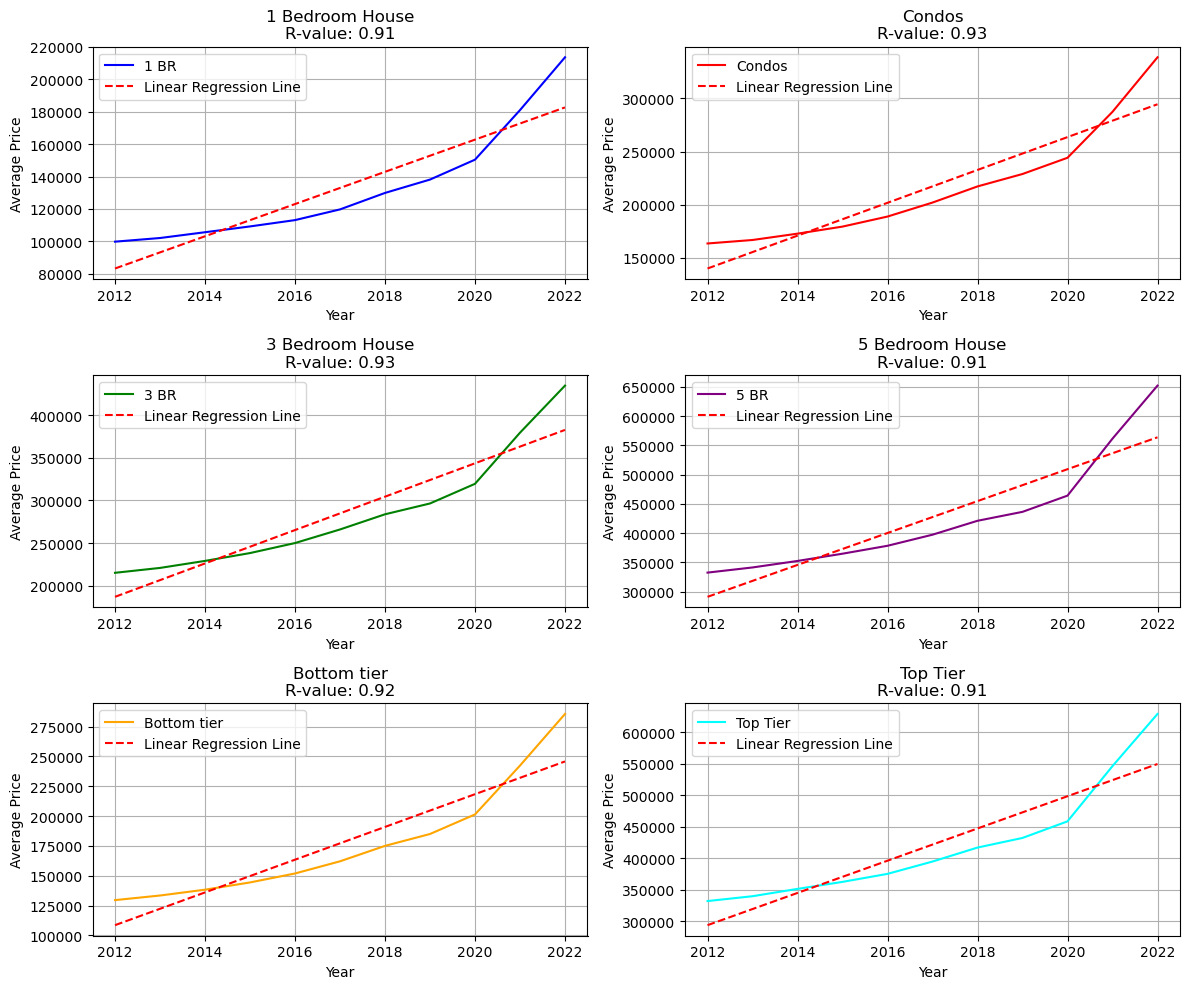

In [18]:

NH_1BR_df=NH_group_df[NH_group_df['property type']=='1 bedroom homes']
NH_Con_df=NH_group_df[NH_group_df['property type']=='condos']
CA_3BR_df=NH_group_df[NH_group_df['property type']=='3 bedroom homes']
CA_5BR_df=NH_group_df[NH_group_df['property type']=='5+ bedroom homes']
CA_Btm_df=NH_group_df[NH_group_df['property type']=='All home type - bottom tier']
CA_Top_df=NH_group_df[NH_group_df['property type']=='All home types - top tier']



fig, axs = plt.subplots(3, 2, figsize=(12,10))  # 3 rows, 2 columns

# Plot the first graph on the top-left subplot (axs[0, 0])
x1=NH_1BR_df['year']
y1=NH_1BR_df['avg_price']
slope1, intercept1, r_value1, pvalue1 , stderr1 = linregress(x1, y1)
axs[0, 0].plot(NH_1BR_df['year'], NH_1BR_df['avg_price'], label='1 BR', color='blue')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Average Price')
axs[0, 0].set_title(f'1 Bedroom House\nR-value: {r_value1:.2f}')
axs[0, 0].plot(NH_1BR_df['year'], slope1 * NH_1BR_df['year'] + intercept1, color='red', linestyle='--', label='Linear Regression Line')



# Plot the second graph on the top-right subplot (axs[0, 1])
slope2, intercept2, r_value2, pvalue2 , stderr2 = linregress(NH_Con_df['year'], NH_Con_df['avg_price'])
axs[0, 1].plot(NH_Con_df['year'], NH_Con_df['avg_price'], label='Condos', color='red')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Average Price')
axs[0, 1].set_title(f'Condos\nR-value: {r_value2:.2f}')
axs[0, 1].plot(NH_Con_df['year'], slope2 * NH_Con_df['year'] + intercept2, color='red', linestyle='--', label='Linear Regression Line')


# Plot the third graph on the middle-left subplot (axs[1, 0])
slope3, intercept3, r_value3, pvalue3 , stderr3 = linregress(CA_3BR_df['year'], CA_3BR_df['avg_price'])
axs[1, 0].plot(CA_3BR_df['year'], CA_3BR_df['avg_price'], label='3 BR', color='green')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Average Price')
axs[1, 0].set_title(f'3 Bedroom House\nR-value: {r_value3:.2f}')
axs[1, 0].plot(CA_3BR_df['year'], slope3 * CA_3BR_df['year'] + intercept3, color='red', linestyle='--', label='Linear Regression Line')

# Plot the fourth graph on the middle-right subplot (axs[1, 1])
slope4, intercept4, r_value4, pvalue4 , stderr4 = linregress(CA_5BR_df['year'], CA_5BR_df['avg_price'])
axs[1, 1].plot(CA_5BR_df['year'], CA_5BR_df['avg_price'], label='5 BR', color='purple')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Average Price')
axs[1, 1].set_title(f'5 Bedroom House\nR-value: {r_value4:.2f}')
axs[1, 1].plot(CA_5BR_df['year'], slope4 * CA_5BR_df['year'] + intercept4, color='red', linestyle='--', label='Linear Regression Line')

# Plot the fifth graph on the bottom-left subplot (axs[2, 0])
slope5, intercept5, r_value5, pvalue5 , stderr5 = linregress(CA_Btm_df['year'], CA_Btm_df['avg_price'])
axs[2, 0].plot(CA_Btm_df['year'], CA_Btm_df['avg_price'], label='Bottom tier', color='orange')
axs[2, 0].set_xlabel('Year')
axs[2, 0].set_ylabel('Average Price')
axs[2, 0].set_title(f'Bottom tier\nR-value: {r_value5:.2f}')
axs[2, 0].plot(CA_Btm_df['year'], slope5 * CA_Btm_df['year'] + intercept5, color='red', linestyle='--', label='Linear Regression Line')
# Plot the fifth graph on the bottom-left subplot (axs[2, 0])
slope6, intercept6, r_value6, pvalue6 , stderr6 = linregress(CA_Top_df['year'], CA_Top_df['avg_price'])
axs[2, 1].plot(CA_Top_df['year'], CA_Top_df['avg_price'], label='Top Tier', color='cyan')
axs[2, 1].set_xlabel('Year')
axs[2, 1].set_ylabel('Average Price')
axs[2, 1].set_title(f'Top Tier\nR-value: {r_value6:.2f}')
axs[2,1].plot(CA_Top_df['year'], slope6 * CA_Top_df['year'] + intercept6, color='red', linestyle='--', label='Linear Regression Line')


# Add legends to all subplots
for ax in axs.flat:
    ax.legend()
    ax.grid()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



In [20]:

NH_df= pd.DataFrame({ "Property type" : ['1 bedroom homes', 'condos', '3 bedroom homes', '5+ bedroom homes', 'All home type - bottom tier', 'All home type - Top tier'],
                             "2012_value": [ NH_1BR_df.loc[NH_1BR_df['year'] == 2012, 'avg_price'].values[0],
                                            NH_Con_df.loc[NH_Con_df['year'] == 2012, 'avg_price'].values[0],
                                            CA_3BR_df.loc[CA_3BR_df['year'] == 2012, 'avg_price'].values[0],
                                            CA_5BR_df.loc[CA_5BR_df['year'] == 2012, 'avg_price'].values[0],
                                            CA_Btm_df.loc[CA_Btm_df['year'] == 2012, 'avg_price'].values[0],
                                            CA_Top_df.loc[CA_Top_df['year'] == 2012, 'avg_price'].values[0]],
                             
                             "2022_value":[ NH_1BR_df.loc[NH_1BR_df['year'] == 2022, 'avg_price'].values[0],
                                            NH_Con_df.loc[NH_Con_df['year'] == 2022, 'avg_price'].values[0],
                                            CA_3BR_df.loc[CA_3BR_df['year'] == 2022, 'avg_price'].values[0],
                                            CA_5BR_df.loc[CA_5BR_df['year'] == 2022, 'avg_price'].values[0],
                                            CA_Btm_df.loc[CA_Btm_df['year'] == 2022, 'avg_price'].values[0],
                                            CA_Top_df.loc[CA_Top_df['year'] == 2022, 'avg_price'].values[0]],
                             "NH_CAGR" : ""
    
})
NH_df

,Property type,2012_value,2022_value,NH_CAGR
0,1 bedroom homes,99789.666667,213565.750000,
1,condos,163323.916667,338826.416667,
2,3 bedroom homes,215101.666667,434800.166667,
3,5+ bedroom homes,332483.750000,652166.583333,
4,All home type - bottom tier,129516.833333,285624.333333,
5,All home type - Top tier,331863.833333,628999.750000,


In [21]:
#calculate Annual growth rate
n=(2022-2012)

NH_df['NH_CAGR']=round(((((NH_df['2022_value'])/ (NH_df['2012_value'])) ** (1 / n)) - 1)*100,2)
NH_df['NH_CAGR']=NH_df['NH_CAGR'].astype(str) + '%'
NH_df

,Property type,2012_value,2022_value,NH_CAGR
0,1 bedroom homes,99789.666667,213565.750000,7.91%
1,condos,163323.916667,338826.416667,7.57%
2,3 bedroom homes,215101.666667,434800.166667,7.29%
3,5+ bedroom homes,332483.750000,652166.583333,6.97%
4,All home type - bottom tier,129516.833333,285624.333333,8.23%
5,All home type - Top tier,331863.833333,628999.750000,6.6%


The New Hamphsire dataframe provides the Compound annual growth rate of the state New Hamphshire. It shows that highest growth rate is 12.3% which is shown by Bottom tier homes followed by 1 bedroom homes which indicates growth rates of 11.26%

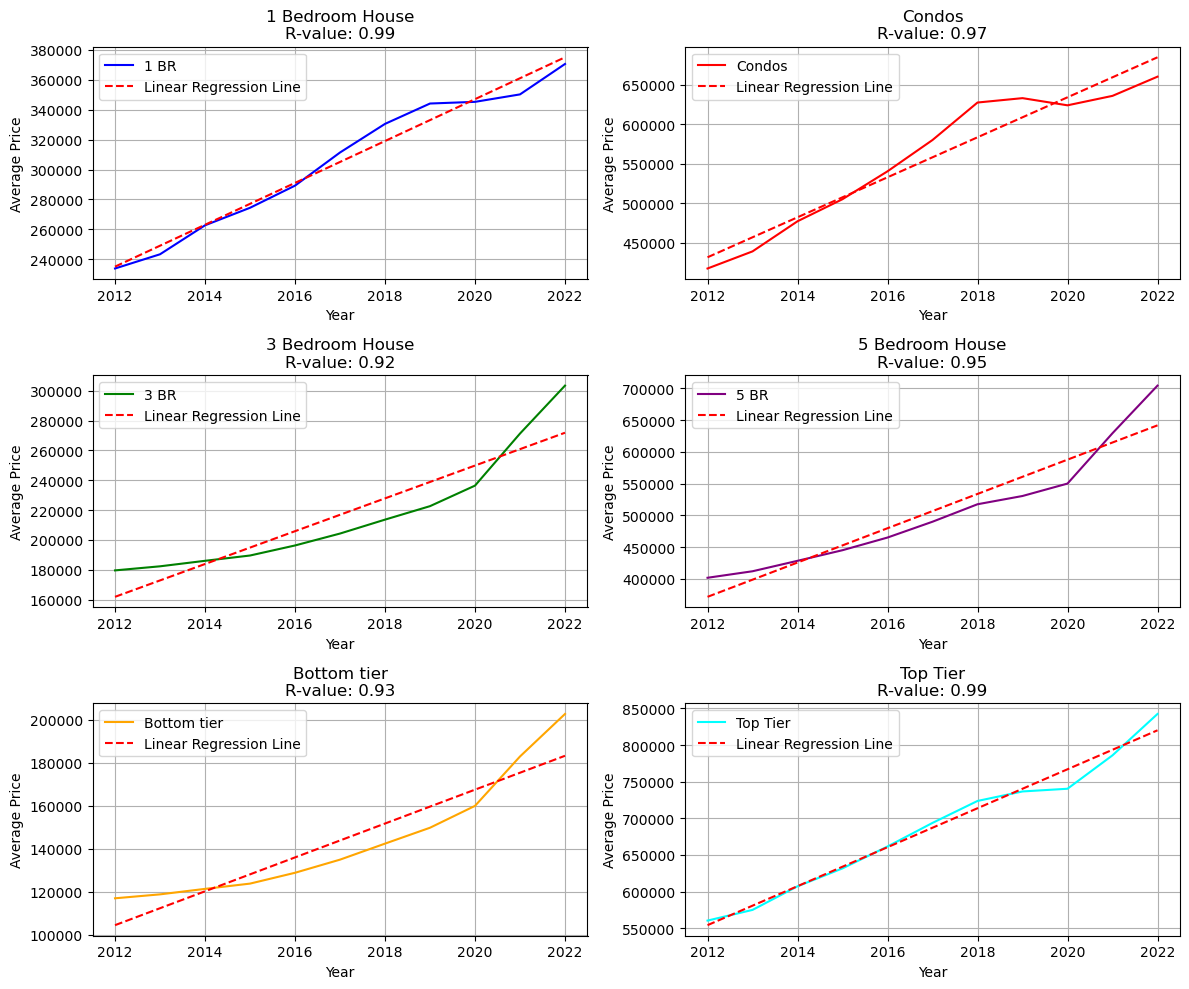

In [22]:


me_1BR_df=me_group_df[me_group_df['property type']=='1 bedroom homes']
me_Con_df=me_group_df[me_group_df['property type']=='condos']
me_3BR_df=me_group_df[me_group_df['property type']=='3 bedroom homes']
me_5BR_df=me_group_df[me_group_df['property type']=='5+ bedroom homes']
me_Btm_df=me_group_df[me_group_df['property type']=='All home type - bottom tier']
me_Top_df=me_group_df[me_group_df['property type']=='All home types - top tier']



fig, axs = plt.subplots(3, 2, figsize=(12,10))  # 3 rows, 2 columns

# Plot the first graph on the top-left subplot (axs[0, 0])
x1=me_1BR_df['year']
y1=me_1BR_df['avg_price']
slope1, intercept1, r_value1, pvalue1 , stderr1 = linregress(x1, y1)
axs[0, 0].plot(me_1BR_df['year'], me_1BR_df['avg_price'], label='1 BR', color='blue')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Average Price')
axs[0, 0].set_title(f'1 Bedroom House\nR-value: {r_value1:.2f}')
axs[0, 0].plot(me_1BR_df['year'], slope1 * me_1BR_df['year'] + intercept1, color='red', linestyle='--', label='Linear Regression Line')



# Plot the second graph on the top-right subplot (axs[0, 1])
slope2, intercept2, r_value2, pvalue2 , stderr2 = linregress(me_Con_df['year'], me_Con_df['avg_price'])
axs[0, 1].plot(me_Con_df['year'], me_Con_df['avg_price'], label='Condos', color='red')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Average Price')
axs[0, 1].set_title(f'Condos\nR-value: {r_value2:.2f}')
axs[0, 1].plot(me_Con_df['year'], slope2 * me_Con_df['year'] + intercept2, color='red', linestyle='--', label='Linear Regression Line')


# Plot the third graph on the middle-left subplot (axs[1, 0])
slope3, intercept3, r_value3, pvalue3 , stderr3 = linregress(me_3BR_df['year'], me_3BR_df['avg_price'])
axs[1, 0].plot(me_3BR_df['year'], me_3BR_df['avg_price'], label='3 BR', color='green')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Average Price')
axs[1, 0].set_title(f'3 Bedroom House\nR-value: {r_value3:.2f}')
axs[1, 0].plot(me_3BR_df['year'], slope3 * me_3BR_df['year'] + intercept3, color='red', linestyle='--', label='Linear Regression Line')

# Plot the fourth graph on the middle-right subplot (axs[1, 1])
slope4, intercept4, r_value4, pvalue4 , stderr4 = linregress(me_5BR_df['year'], me_5BR_df['avg_price'])
axs[1, 1].plot(me_5BR_df['year'], me_5BR_df['avg_price'], label='5 BR', color='purple')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Average Price')
axs[1, 1].set_title(f'5 Bedroom House\nR-value: {r_value4:.2f}')
axs[1, 1].plot(me_5BR_df['year'], slope4 * me_5BR_df['year'] + intercept4, color='red', linestyle='--', label='Linear Regression Line')

# Plot the fifth graph on the bottom-left subplot (axs[2, 0])
slope5, intercept5, r_value5, pvalue5 , stderr5 = linregress(me_Btm_df['year'], me_Btm_df['avg_price'])
axs[2, 0].plot(me_Btm_df['year'], me_Btm_df['avg_price'], label='Bottom tier', color='orange')
axs[2, 0].set_xlabel('Year')
axs[2, 0].set_ylabel('Average Price')
axs[2, 0].set_title(f'Bottom tier\nR-value: {r_value5:.2f}')
axs[2, 0].plot(me_Btm_df['year'], slope5 * me_Btm_df['year'] + intercept5, color='red', linestyle='--', label='Linear Regression Line')
# Plot the fifth graph on the bottom-left subplot (axs[2, 0])
slope6, intercept6, r_value6, pvalue6 , stderr6 = linregress(me_Top_df['year'], me_Top_df['avg_price'])
axs[2, 1].plot(me_Top_df['year'], me_Top_df['avg_price'], label='Top Tier', color='cyan')
axs[2, 1].set_xlabel('Year')
axs[2, 1].set_ylabel('Average Price')
axs[2, 1].set_title(f'Top Tier\nR-value: {r_value6:.2f}')
axs[2,1].plot(me_Top_df['year'], slope6 * me_Top_df['year'] + intercept6, color='red', linestyle='--', label='Linear Regression Line')


# Add legends to all subplots
for ax in axs.flat:
    ax.legend()
    ax.grid()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



In [23]:

ME_df= pd.DataFrame({ "Property type" : ['1 bedroom homes', 'condos', '3 bedroom homes', '5+ bedroom homes', 'All home type - bottom tier', 'All home type - Top tier'],
                             "2012_value": [ me_1BR_df.loc[me_1BR_df['year'] == 2012, 'avg_price'].values[0],
                                            me_Con_df.loc[me_Con_df['year'] == 2012, 'avg_price'].values[0],
                                            me_3BR_df.loc[me_3BR_df['year'] == 2012, 'avg_price'].values[0],
                                            me_5BR_df.loc[me_5BR_df['year'] == 2012, 'avg_price'].values[0],
                                            me_Btm_df.loc[me_Btm_df['year'] == 2012, 'avg_price'].values[0],
                                            me_Top_df.loc[me_Top_df['year'] == 2012, 'avg_price'].values[0]],
                             
                             "2022_value":[ me_1BR_df.loc[me_1BR_df['year'] == 2022, 'avg_price'].values[0],
                                            me_Con_df.loc[me_Con_df['year'] == 2022, 'avg_price'].values[0],
                                            me_3BR_df.loc[me_3BR_df['year'] == 2022, 'avg_price'].values[0],
                                            me_5BR_df.loc[me_5BR_df['year'] == 2022, 'avg_price'].values[0],
                                            me_Btm_df.loc[me_Btm_df['year'] == 2022, 'avg_price'].values[0],
                                            me_Top_df.loc[me_Top_df['year'] == 2022, 'avg_price'].values[0]],
                             "Me_CAGR" : ""
    
})
n=(2022-2012)

ME_df['Me_CAGR']=round(((((ME_df['2022_value'])/ (ME_df['2012_value'])) ** (1 / n)) - 1)*100,2)
ME_df['Me_CAGR']=ME_df['Me_CAGR'].astype(str) + '%'
ME_df

,Property type,2012_value,2022_value,Me_CAGR
0,1 bedroom homes,233902.333333,370531.083333,4.71%
1,condos,417696.083333,660032.500000,4.68%
2,3 bedroom homes,179589.000000,303383.083333,5.38%
3,5+ bedroom homes,401877.666667,704265.083333,5.77%
4,All home type - bottom tier,116889.333333,202575.583333,5.65%
5,All home type - Top tier,560316.750000,842532.500000,4.16%


The above dataframe indicats the CAGR values for various property types in Maine state. It indicates the highest growth in 5 + bedroom houses of 5.77% followed by Bottom tier houses at 5.66% annual growth.

In [24]:
combined_df=ME_df[['Property type','Me_CAGR']]
combined_df['NH_CAGR']=NH_df['NH_CAGR']
combined_df

C:\Users\Omar\AppData\Local\Temp\ipykernel_14172\1772174024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['NH_CAGR']=NH_df['NH_CAGR']


,Property type,Me_CAGR,NH_CAGR
0,1 bedroom homes,4.71%,7.91%
1,condos,4.68%,7.57%
2,3 bedroom homes,5.38%,7.29%
3,5+ bedroom homes,5.77%,6.97%
4,All home type - bottom tier,5.65%,8.23%
5,All home type - Top tier,4.16%,6.6%
